In [1]:
#Document steps, new extrapolate on data ben, version 3 in files.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import descartes
from shapely.geometry import Point, Polygon
import os
import datetime
import sklearn
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.linear_model import LinearRegression

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timezone

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.tsa.statespace.tools import diff
from statsmodels.tsa.seasonal import seasonal_decompose

from IPython.core.display import display, HTML

from io import StringIO
from scipy.optimize import curve_fit

In [2]:
#Settings
pd.options.display.max_columns = None
%matplotlib inline
sns.set(style="darkgrid")
random_seed = 42
chd = os.chdir('C:/Downloads')
display(HTML("<style>.container { width:100% !important; }</style>"))
CURR_DIR = os.getcwd()

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [211]:
data = pd.read_csv(CURR_DIR + '\extrapolated_input_features_future_latest_2501_3.csv', delimiter=',') 
data

BOROUGH  YEAR     POPULATION  POPULATION 0 TO 15 Y/O  POPULATION 15 TO 25 Y/O  POPULATION 25 TO 45 Y/O  POPULATION 45 TO 65 Y/O  POPULATION 65 Y/O AND UP  TOTAL HOUSEHOLDS  SINGLE-PERSON HOUSEHOLDS  HOUSEHOLDS W/O CHILDREN  HOUSEHOLDS /W CHILDREN  AIRBNB_REVIEWS  UNEMPLOYMENT_WW  NUMBER_OF_JOBS  GUESTS_HOTELS  OVERNIGHT_STAYS_HOTELS  BUILT_before_1945  BUILT_1945_to_1965  BUILT_1965_to_1975  BUILT_1975_to_1985  BUILT_1985_to_1995  BUILT_1995_to_2005  BUILT_2005_to_2015  RENTAL_HOMES  UNINHABITED   LOW_INCOMES   HIGH_INCOME  PLACES_TO_EAT  NATURAL_GAS_M3  ELECTRICITY_KWH
0      Amstelveen  2011   81796.000000            13594.000000              9688.000000             21091.000000             22362.000000              15061.000000      39669.000000              17441.000000              9879.000000            12349.000000        0.000000      1100.000000    42700.000000   3.227352e+04                 58852.0        3524.000006         9905.999938        14798.999860         3282.999949         6322.000085         2810.999999         4132.000140  21857.999675  1735.999917  30259.486138  23774.244106           70.6     1400.000000      3150.000000
1      Amstelveen  2012   83363.000000            13927.000000              9850.000000             21508.000000             22440.000000              15638.000000      40295.000000              17602.000000             10070.000000            12623.000000        0.000000      1390.000000    41500.000000   3.301597e+04                 60778.6        3521.000005         9889.999949        14145.499891         3281.999958         6444.500075         2820.999999         4186.000118  21785.799727  1881.999932  30658.122115  23926.380069           71.4     1500.000000      3100.000000
2      Amstelveen  2013   84379.000000            14182.000000             10070.000000             21666.000000             22472.000000              15989.000000      40865.000000              17999.000000              9990.000000            12876.000000        0.000000      1710.000000    41500.000000   3.405320e+04                 63663.2        3518.000004         9873.999960        13491.999923         3280.999967         6567.000065         2831.000000         4240.000096  21713.599779  2027.999947  31056.758092  24078.516032           72.1     1550.000000      3100.000000
3      Amstelveen  2014   85015.000000            14359.000000             10167.000000             21619.000000             22678.000000              16192.000000      40942.000000              17779.000000             10025.000000            13138.000000        0.000000      1680.000000    40400.000000   3.555400e+04                 66833.0        3515.000003         9857.999971        12838.499954         3279.999977         6689.500054         2841.000000         4294.000074  21641.399831  2173.999962  31455.394069  24230.651995           72.9     1150.000000      3000.000000
4      Amstelveen  2015   87162.000000            14857.000000             10560.000000             22158.000000             22993.000000              16594.000000      42154.000000              18468.000000             10187.000000            13499.000000        0.000000      1570.000000    41800.000000   3.456914e+04                 65324.8        3515.000000         9850.000000        12205.000000         3280.000000         6795.000000         2855.000000         4220.000000  21231.000000  2445.000000  31511.270000  24201.420000           73.9     1150.000000      2930.000000
5      Amstelveen  2016   88602.000000            15287.000000             10607.000000             22752.000000             23163.000000              16793.000000      42636.000000              18606.000000             10229.000000            13801.000000        0.000000      1610.000000    42800.000000   3.498444e+04                 67288.5        3510.000000         9815.000000        12175.000000         3275.000000         6800.000000         2860.000000         4550.000000  221

In [212]:
data = data[data.YEAR != 2021]
data = data[data.YEAR != 2022]
data = data[data.YEAR != 2023]
data = data[data.YEAR != 2024]
data = data[data.YEAR != 2025]
data = data[data.YEAR != 2026]


In [213]:
data

BOROUGH  YEAR  POPULATION  POPULATION 0 TO 15 Y/O  POPULATION 15 TO 25 Y/O  POPULATION 25 TO 45 Y/O  POPULATION 45 TO 65 Y/O  POPULATION 65 Y/O AND UP  TOTAL HOUSEHOLDS  SINGLE-PERSON HOUSEHOLDS  HOUSEHOLDS W/O CHILDREN  HOUSEHOLDS /W CHILDREN  AIRBNB_REVIEWS  UNEMPLOYMENT_WW  NUMBER_OF_JOBS  GUESTS_HOTELS  OVERNIGHT_STAYS_HOTELS  BUILT_before_1945  BUILT_1945_to_1965  BUILT_1965_to_1975  BUILT_1975_to_1985  BUILT_1985_to_1995  BUILT_1995_to_2005  BUILT_2005_to_2015  RENTAL_HOMES  UNINHABITED   LOW_INCOMES   HIGH_INCOME  PLACES_TO_EAT  NATURAL_GAS_M3  ELECTRICITY_KWH
0      Amstelveen  2011     81796.0                13594.00                  9688.00                 21091.00                 22362.00                  15061.00           39669.0                  17441.00                  9879.00                12349.00             0.0       1100.00000    42700.000000       32273.52                 58852.0        3524.000006         9905.999938        14798.999860         3282.999949         6322.000085         2810.999999         4132.000140  21857.999675  1735.999917  30259.486138  23774.244106           70.6     1400.000000      3150.000000
1      Amstelveen  2012     83363.0                13927.00                  9850.00                 21508.00                 22440.00                  15638.00           40295.0                  17602.00                 10070.00                12623.00             0.0       1390.00000    41500.000000       33015.97                 60778.6        3521.000005         9889.999949        14145.499891         3281.999958         6444.500075         2820.999999         4186.000118  21785.799727  1881.999932  30658.122115  23926.380069           71.4     1500.000000      3100.000000
2      Amstelveen  2013     84379.0                14182.00                 10070.00                 21666.00                 22472.00                  15989.00           40865.0                  17999.00                  9990.00                12876.00             0.0       1710.00000    41500.000000       34053.20                 63663.2        3518.000004         9873.999960        13491.999923         3280.999967         6567.000065         2831.000000         4240.000096  21713.599779  2027.999947  31056.758092  24078.516032           72.1     1550.000000      3100.000000
3      Amstelveen  2014     85015.0                14359.00                 10167.00                 21619.00                 22678.00                  16192.00           40942.0                  17779.00                 10025.00                13138.00             0.0       1680.00000    40400.000000       35554.00                 66833.0        3515.000003         9857.999971        12838.499954         3279.999977         6689.500054         2841.000000         4294.000074  21641.399831  2173.999962  31455.394069  24230.651995           72.9     1150.000000      3000.000000
4      Amstelveen  2015     87162.0                14857.00                 10560.00                 22158.00                 22993.00                  16594.00           42154.0                  18468.00                 10187.00                13499.00             0.0       1570.00000    41800.000000       34569.14                 65324.8        3515.000000         9850.000000        12205.000000         3280.000000         6795.000000         2855.000000         4220.000000  21231.000000  2445.000000  31511.270000  24201.420000           73.9     1150.000000      2930.000000
5      Amstelveen  2016     88602.0                15287.00                 10607.00                 22752.00                 23163.00                  16793.00           42636.0                  18606.00                 10229.00                13801.00             0.0       1610.00000    42800.000000       34984.44                 67288.5        3510.000000         9815.000000        12175.000000         3275.000000         6800.000000         2860.000000         4550.000000  22121.000000  2215.00000

In [214]:
df = data

In [215]:
data.describe()

YEAR     POPULATION  POPULATION 0 TO 15 Y/O  POPULATION 15 TO 25 Y/O  POPULATION 25 TO 45 Y/O  POPULATION 45 TO 65 Y/O  POPULATION 65 Y/O AND UP  TOTAL HOUSEHOLDS  SINGLE-PERSON HOUSEHOLDS  HOUSEHOLDS W/O CHILDREN  HOUSEHOLDS /W CHILDREN  AIRBNB_REVIEWS  UNEMPLOYMENT_WW  NUMBER_OF_JOBS  GUESTS_HOTELS  OVERNIGHT_STAYS_HOTELS  BUILT_before_1945  BUILT_1945_to_1965  BUILT_1965_to_1975  BUILT_1975_to_1985  BUILT_1985_to_1995  BUILT_1995_to_2005  BUILT_2005_to_2015  RENTAL_HOMES  UNINHABITED   LOW_INCOMES   HIGH_INCOME  PLACES_TO_EAT  NATURAL_GAS_M3  ELECTRICITY_KWH
count   130.000000     130.000000              130.000000               130.000000               130.000000               130.000000                130.000000        130.000000                130.000000               130.000000              130.000000      130.000000       130.000000      130.000000   1.300000e+02            1.300000e+02         130.000000          130.000000          130.000000          130.000000          130.000000          130.000000          130.000000    130.000000   130.000000    130.000000    130.000000     130.000000      130.000000       130.000000
mean   2015.500000   75720.384615            11755.451538              9637.416923             25424.488846             18915.163077               9986.969615      40471.792308              21535.009615              8565.104615            10401.892692     3477.507692      1512.561539    46114.646149   5.673137e+05            9.849634e+05       15823.576908         5203.576942         4022.057697         3738.173087         4258.326936         2829.038456         3668.673070  26033.680635  2465.807556  38397.723903  14867.632264     528.509231      486.788462      1102.320513
std       2.883393   53849.231690             8584.143159              7037.853043             20992.486409             12528.257808               6632.316972      30046.754021              17549.768339              6236.373921             7350.691484     6970.171881      1169.673141    33395.609981   9.456910e+05            1.677908e+06       21695.353885         7671.745075         3825.206813         4694.475040         3098.281441         3164.272455         4280.034464  21198.972877  2208.304156  30345.664813  11558.112920     793.634336      596.657052      1297.230279
min    2011.000000       0.000000                0.000000                 0.000000                 0.000000                 0.000000                  0.000000          0.000000                  0.000000                 0.000000                0.000000        0.000000         0.000000        0.000000   0.000000e+00            0.000000e+00           0.000000            0.000000            0.000000            0.000000            0.000000            0.000000            0.000000      0.000000     0.000000      0.000000      0.000000       0.000000        0.000000         0.000000
25%    2013.000000   25396.000000             3932.250000              2410.250000              4818.500000              7199.000000               3891.250000      11557.500000               4068.750000              2928.750000             3908.500000        0.000000       302.500000    19206.250000   6.414400e+02            1.201900e+03         382.750000          575.000000          753.750000          890.250042         1390.000000          775.000000          905.000000   4051.500000   545.000000   7449.240595   5772.074421      21.525000      100.800258       233.597278
50%    2015.500000   86352.500000            14542.500000             10583.500000             24101.475000             23317.000000              10929.925000      42940.000000              19792.500000              9515.000000            13634.950000        9.500000      1590.000000    41600.000000   2.044417e+05            3.475246e+05        3512.500000         1955.000000         2550.000000         3277.499988         5010.000000         1916.750000         3011.499995  27704.999839  1725.499959  38138.633461  1

In [216]:
data

BOROUGH  YEAR  POPULATION  POPULATION 0 TO 15 Y/O  POPULATION 15 TO 25 Y/O  POPULATION 25 TO 45 Y/O  POPULATION 45 TO 65 Y/O  POPULATION 65 Y/O AND UP  TOTAL HOUSEHOLDS  SINGLE-PERSON HOUSEHOLDS  HOUSEHOLDS W/O CHILDREN  HOUSEHOLDS /W CHILDREN  AIRBNB_REVIEWS  UNEMPLOYMENT_WW  NUMBER_OF_JOBS  GUESTS_HOTELS  OVERNIGHT_STAYS_HOTELS  BUILT_before_1945  BUILT_1945_to_1965  BUILT_1965_to_1975  BUILT_1975_to_1985  BUILT_1985_to_1995  BUILT_1995_to_2005  BUILT_2005_to_2015  RENTAL_HOMES  UNINHABITED   LOW_INCOMES   HIGH_INCOME  PLACES_TO_EAT  NATURAL_GAS_M3  ELECTRICITY_KWH
0      Amstelveen  2011     81796.0                13594.00                  9688.00                 21091.00                 22362.00                  15061.00           39669.0                  17441.00                  9879.00                12349.00             0.0       1100.00000    42700.000000       32273.52                 58852.0        3524.000006         9905.999938        14798.999860         3282.999949         6322.000085         2810.999999         4132.000140  21857.999675  1735.999917  30259.486138  23774.244106           70.6     1400.000000      3150.000000
1      Amstelveen  2012     83363.0                13927.00                  9850.00                 21508.00                 22440.00                  15638.00           40295.0                  17602.00                 10070.00                12623.00             0.0       1390.00000    41500.000000       33015.97                 60778.6        3521.000005         9889.999949        14145.499891         3281.999958         6444.500075         2820.999999         4186.000118  21785.799727  1881.999932  30658.122115  23926.380069           71.4     1500.000000      3100.000000
2      Amstelveen  2013     84379.0                14182.00                 10070.00                 21666.00                 22472.00                  15989.00           40865.0                  17999.00                  9990.00                12876.00             0.0       1710.00000    41500.000000       34053.20                 63663.2        3518.000004         9873.999960        13491.999923         3280.999967         6567.000065         2831.000000         4240.000096  21713.599779  2027.999947  31056.758092  24078.516032           72.1     1550.000000      3100.000000
3      Amstelveen  2014     85015.0                14359.00                 10167.00                 21619.00                 22678.00                  16192.00           40942.0                  17779.00                 10025.00                13138.00             0.0       1680.00000    40400.000000       35554.00                 66833.0        3515.000003         9857.999971        12838.499954         3279.999977         6689.500054         2841.000000         4294.000074  21641.399831  2173.999962  31455.394069  24230.651995           72.9     1150.000000      3000.000000
4      Amstelveen  2015     87162.0                14857.00                 10560.00                 22158.00                 22993.00                  16594.00           42154.0                  18468.00                 10187.00                13499.00             0.0       1570.00000    41800.000000       34569.14                 65324.8        3515.000000         9850.000000        12205.000000         3280.000000         6795.000000         2855.000000         4220.000000  21231.000000  2445.000000  31511.270000  24201.420000           73.9     1150.000000      2930.000000
5      Amstelveen  2016     88602.0                15287.00                 10607.00                 22752.00                 23163.00                  16793.00           42636.0                  18606.00                 10229.00                13801.00             0.0       1610.00000    42800.000000       34984.44                 67288.5        3510.000000         9815.000000        12175.000000         3275.000000         6800.000000         2860.000000         4550.000000  22121.000000  2215.00000

In [217]:
df.columns

Index(['BOROUGH', 'YEAR', 'POPULATION', 'POPULATION 0 TO 15 Y/O', 'POPULATION 15 TO 25 Y/O', 'POPULATION 25 TO 45 Y/O', 'POPULATION 45 TO 65 Y/O', 'POPULATION 65 Y/O AND UP', 'TOTAL HOUSEHOLDS', 'SINGLE-PERSON HOUSEHOLDS', 'HOUSEHOLDS W/O CHILDREN', 'HOUSEHOLDS /W CHILDREN', 'AIRBNB_REVIEWS', 'UNEMPLOYMENT_WW', 'NUMBER_OF_JOBS', 'GUESTS_HOTELS', 'OVERNIGHT_STAYS_HOTELS', 'BUILT_before_1945', 'BUILT_1945_to_1965', 'BUILT_1965_to_1975', 'BUILT_1975_to_1985', 'BUILT_1985_to_1995', 'BUILT_1995_to_2005', 'BUILT_2005_to_2015', 'RENTAL_HOMES', 'UNINHABITED', 'LOW_INCOMES', 'HIGH_INCOME', 'PLACES_TO_EAT', 'NATURAL_GAS_M3', 'ELECTRICITY_KWH'], dtype='object')

In [218]:
scope = ['Amstelveen','Centrum', 'Diemen', 'Heemstede','Nieuw-West', 'Noord', 'Oost', 'Ouder-Amstel', 'West', 'Zuid', 'Zuidoost']   # 'Muiden' 'Westpoort',

In [219]:
# Capture the necessary data
variables = df.columns

count = []

for variable in variables:
    length = df[variable].count()
    count.append(length)
    
count_pct = np.round(100 * pd.Series(count) / len(df), 2)

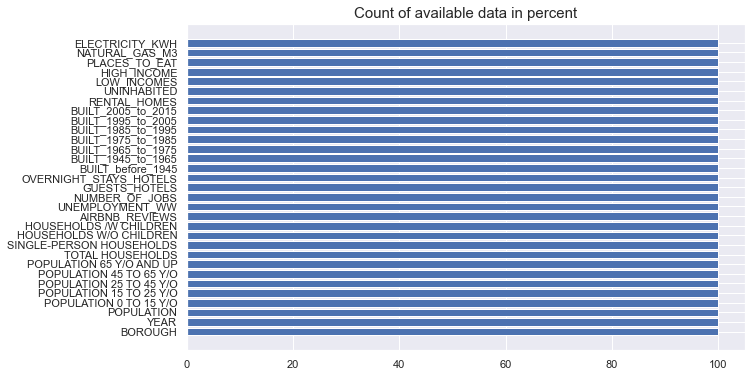

In [220]:
#Plot number of available data per variable
plt.figure(figsize=(10,6))
plt.barh(variables, count_pct)
plt.title('Count of available data in percent', fontsize=15)
plt.show()

In [221]:
nan_cols = [i for i in df.columns if df[i].isnull().any()]
nan_cols

[]

In [222]:
year = ['2021','2022','2023','2024','2025','2026']
for b in scope:   
    for y in year:
        new_row = {'BOROUGH':b,'YEAR':y}
        df = df.append(new_row, ignore_index=True)
    print(new_row)

{'BOROUGH': 'Amstelveen', 'YEAR': '2026'}
{'BOROUGH': 'Centrum', 'YEAR': '2026'}
{'BOROUGH': 'Diemen', 'YEAR': '2026'}
{'BOROUGH': 'Heemstede', 'YEAR': '2026'}
{'BOROUGH': 'Nieuw-West', 'YEAR': '2026'}
{'BOROUGH': 'Noord', 'YEAR': '2026'}
{'BOROUGH': 'Oost', 'YEAR': '2026'}
{'BOROUGH': 'Ouder-Amstel', 'YEAR': '2026'}
{'BOROUGH': 'West', 'YEAR': '2026'}
{'BOROUGH': 'Zuid', 'YEAR': '2026'}
{'BOROUGH': 'Zuidoost', 'YEAR': '2026'}


In [223]:
df

BOROUGH  YEAR  POPULATION  POPULATION 0 TO 15 Y/O  POPULATION 15 TO 25 Y/O  POPULATION 25 TO 45 Y/O  POPULATION 45 TO 65 Y/O  POPULATION 65 Y/O AND UP  TOTAL HOUSEHOLDS  SINGLE-PERSON HOUSEHOLDS  HOUSEHOLDS W/O CHILDREN  HOUSEHOLDS /W CHILDREN  AIRBNB_REVIEWS  UNEMPLOYMENT_WW  NUMBER_OF_JOBS  GUESTS_HOTELS  OVERNIGHT_STAYS_HOTELS  BUILT_before_1945  BUILT_1945_to_1965  BUILT_1965_to_1975  BUILT_1975_to_1985  BUILT_1985_to_1995  BUILT_1995_to_2005  BUILT_2005_to_2015  RENTAL_HOMES  UNINHABITED   LOW_INCOMES   HIGH_INCOME  PLACES_TO_EAT  NATURAL_GAS_M3  ELECTRICITY_KWH
0      Amstelveen  2011     81796.0                13594.00                  9688.00                 21091.00                 22362.00                  15061.00           39669.0                  17441.00                  9879.00                12349.00             0.0       1100.00000    42700.000000       32273.52                 58852.0        3524.000006         9905.999938        14798.999860         3282.999949         6322.000085         2810.999999         4132.000140  21857.999675  1735.999917  30259.486138  23774.244106           70.6     1400.000000      3150.000000
1      Amstelveen  2012     83363.0                13927.00                  9850.00                 21508.00                 22440.00                  15638.00           40295.0                  17602.00                 10070.00                12623.00             0.0       1390.00000    41500.000000       33015.97                 60778.6        3521.000005         9889.999949        14145.499891         3281.999958         6444.500075         2820.999999         4186.000118  21785.799727  1881.999932  30658.122115  23926.380069           71.4     1500.000000      3100.000000
2      Amstelveen  2013     84379.0                14182.00                 10070.00                 21666.00                 22472.00                  15989.00           40865.0                  17999.00                  9990.00                12876.00             0.0       1710.00000    41500.000000       34053.20                 63663.2        3518.000004         9873.999960        13491.999923         3280.999967         6567.000065         2831.000000         4240.000096  21713.599779  2027.999947  31056.758092  24078.516032           72.1     1550.000000      3100.000000
3      Amstelveen  2014     85015.0                14359.00                 10167.00                 21619.00                 22678.00                  16192.00           40942.0                  17779.00                 10025.00                13138.00             0.0       1680.00000    40400.000000       35554.00                 66833.0        3515.000003         9857.999971        12838.499954         3279.999977         6689.500054         2841.000000         4294.000074  21641.399831  2173.999962  31455.394069  24230.651995           72.9     1150.000000      3000.000000
4      Amstelveen  2015     87162.0                14857.00                 10560.00                 22158.00                 22993.00                  16594.00           42154.0                  18468.00                 10187.00                13499.00             0.0       1570.00000    41800.000000       34569.14                 65324.8        3515.000000         9850.000000        12205.000000         3280.000000         6795.000000         2855.000000         4220.000000  21231.000000  2445.000000  31511.270000  24201.420000           73.9     1150.000000      2930.000000
5      Amstelveen  2016     88602.0                15287.00                 10607.00                 22752.00                 23163.00                  16793.00           42636.0                  18606.00                 10229.00                13801.00             0.0       1610.00000    42800.000000       34984.44                 67288.5        3510.000000         9815.000000        12175.000000         3275.000000         6800.000000         2860.000000         4550.000000  22121.000000  2215.00000

In [224]:
df = df.sort_values(by=['BOROUGH','YEAR'])

In [225]:
df = df.reset_index(drop=True)

In [226]:
nan_cols = [i for i in df.columns if df[i].isnull().any()]
nan_cols

['POPULATION',
 'POPULATION 0 TO 15 Y/O',
 'POPULATION 15 TO 25 Y/O',
 'POPULATION 25 TO 45 Y/O',
 'POPULATION 45 TO 65 Y/O',
 'POPULATION 65 Y/O AND UP',
 'TOTAL HOUSEHOLDS',
 'SINGLE-PERSON HOUSEHOLDS',
 'HOUSEHOLDS W/O CHILDREN',
 'HOUSEHOLDS /W CHILDREN',
 'AIRBNB_REVIEWS',
 'UNEMPLOYMENT_WW',
 'NUMBER_OF_JOBS',
 'GUESTS_HOTELS',
 'OVERNIGHT_STAYS_HOTELS',
 'BUILT_before_1945',
 'BUILT_1945_to_1965',
 'BUILT_1965_to_1975',
 'BUILT_1975_to_1985',
 'BUILT_1985_to_1995',
 'BUILT_1995_to_2005',
 'BUILT_2005_to_2015',
 'RENTAL_HOMES',
 'UNINHABITED',
 'LOW_INCOMES',
 'HIGH_INCOME',
 'PLACES_TO_EAT',
 'NATURAL_GAS_M3',
 'ELECTRICITY_KWH']

In [227]:
df

BOROUGH  YEAR  POPULATION  POPULATION 0 TO 15 Y/O  POPULATION 15 TO 25 Y/O  POPULATION 25 TO 45 Y/O  POPULATION 45 TO 65 Y/O  POPULATION 65 Y/O AND UP  TOTAL HOUSEHOLDS  SINGLE-PERSON HOUSEHOLDS  HOUSEHOLDS W/O CHILDREN  HOUSEHOLDS /W CHILDREN  AIRBNB_REVIEWS  UNEMPLOYMENT_WW  NUMBER_OF_JOBS  GUESTS_HOTELS  OVERNIGHT_STAYS_HOTELS  BUILT_before_1945  BUILT_1945_to_1965  BUILT_1965_to_1975  BUILT_1975_to_1985  BUILT_1985_to_1995  BUILT_1995_to_2005  BUILT_2005_to_2015  RENTAL_HOMES  UNINHABITED   LOW_INCOMES   HIGH_INCOME  PLACES_TO_EAT  NATURAL_GAS_M3  ELECTRICITY_KWH
0      Amstelveen  2011     81796.0                13594.00                  9688.00                 21091.00                 22362.00                  15061.00           39669.0                  17441.00                  9879.00                12349.00             0.0       1100.00000    42700.000000       32273.52                 58852.0        3524.000006         9905.999938        14798.999860         3282.999949         6322.000085         2810.999999         4132.000140  21857.999675  1735.999917  30259.486138  23774.244106           70.6     1400.000000      3150.000000
1      Amstelveen  2012     83363.0                13927.00                  9850.00                 21508.00                 22440.00                  15638.00           40295.0                  17602.00                 10070.00                12623.00             0.0       1390.00000    41500.000000       33015.97                 60778.6        3521.000005         9889.999949        14145.499891         3281.999958         6444.500075         2820.999999         4186.000118  21785.799727  1881.999932  30658.122115  23926.380069           71.4     1500.000000      3100.000000
2      Amstelveen  2013     84379.0                14182.00                 10070.00                 21666.00                 22472.00                  15989.00           40865.0                  17999.00                  9990.00                12876.00             0.0       1710.00000    41500.000000       34053.20                 63663.2        3518.000004         9873.999960        13491.999923         3280.999967         6567.000065         2831.000000         4240.000096  21713.599779  2027.999947  31056.758092  24078.516032           72.1     1550.000000      3100.000000
3      Amstelveen  2014     85015.0                14359.00                 10167.00                 21619.00                 22678.00                  16192.00           40942.0                  17779.00                 10025.00                13138.00             0.0       1680.00000    40400.000000       35554.00                 66833.0        3515.000003         9857.999971        12838.499954         3279.999977         6689.500054         2841.000000         4294.000074  21641.399831  2173.999962  31455.394069  24230.651995           72.9     1150.000000      3000.000000
4      Amstelveen  2015     87162.0                14857.00                 10560.00                 22158.00                 22993.00                  16594.00           42154.0                  18468.00                 10187.00                13499.00             0.0       1570.00000    41800.000000       34569.14                 65324.8        3515.000000         9850.000000        12205.000000         3280.000000         6795.000000         2855.000000         4220.000000  21231.000000  2445.000000  31511.270000  24201.420000           73.9     1150.000000      2930.000000
5      Amstelveen  2016     88602.0                15287.00                 10607.00                 22752.00                 23163.00                  16793.00           42636.0                  18606.00                 10229.00                13801.00             0.0       1610.00000    42800.000000       34984.44                 67288.5        3510.000000         9815.000000        12175.000000         3275.000000         6800.000000         2860.000000         4550.000000  22121.000000  2215.00000

In [228]:
# best
def func(x, a, b, c, d):
    return a + b  + c * x + d

In [229]:
guess = (0.5, 0.5, 0.5, 0.5)

In [230]:
# Create copy of data to remove NaNs for curve fitting
fit_df = df.dropna()
# Place to store function parameters for each column
col_params = {}

In [231]:
df.BOROUGH.unique()

array(['Amstelveen', 'Centrum', 'Diemen', 'Heemstede', 'Muiden',
       'Nieuw-West', 'Noord', 'Oost', 'Ouder-Amstel', 'West', 'Westpoort',
       'Zuid', 'Zuidoost'], dtype=object)

In [232]:
fit_df.BOROUGH.unique()

array(['Amstelveen', 'Centrum', 'Diemen', 'Heemstede', 'Muiden',
       'Nieuw-West', 'Noord', 'Oost', 'Ouder-Amstel', 'West', 'Westpoort',
       'Zuid', 'Zuidoost'], dtype=object)

In [233]:
reg='Zuidoost'

In [234]:
reg_fit_df = fit_df[fit_df['BOROUGH']==reg]
reg_fit_df

BOROUGH  YEAR  POPULATION  POPULATION 0 TO 15 Y/O  POPULATION 15 TO 25 Y/O  POPULATION 25 TO 45 Y/O  POPULATION 45 TO 65 Y/O  POPULATION 65 Y/O AND UP  TOTAL HOUSEHOLDS  SINGLE-PERSON HOUSEHOLDS  HOUSEHOLDS W/O CHILDREN  HOUSEHOLDS /W CHILDREN  AIRBNB_REVIEWS  UNEMPLOYMENT_WW  NUMBER_OF_JOBS  GUESTS_HOTELS  OVERNIGHT_STAYS_HOTELS  BUILT_before_1945  BUILT_1945_to_1965  BUILT_1965_to_1975  BUILT_1975_to_1985  BUILT_1985_to_1995  BUILT_1995_to_2005  BUILT_2005_to_2015  RENTAL_HOMES  UNINHABITED   LOW_INCOMES  HIGH_INCOME  PLACES_TO_EAT  NATURAL_GAS_M3  ELECTRICITY_KWH
180  Zuidoost  2011     81910.0                15562.90                 12286.50                 23753.90                  22934.8                    7371.9           41450.0                  20725.00                   6632.0                14093.00             0.0           1889.0         62573.0       48616.36                 88653.7        1911.999542               190.0         7550.000013        18029.000133              4964.0         1390.999787              3847.0  26053.399715       1904.0  49030.786506  7133.403283           38.9       95.498356       221.310506
181  Zuidoost  2012     82855.0                15742.45                 12428.25                 24027.95                  23199.4                    8285.5           42160.0                  21501.60                   6745.6                13912.80             2.0           1842.0         62880.0       68655.72                126387.3        1732.499538               190.0         7617.500002        18152.500108              4975.0         1596.999804              3866.5  26441.799746       1865.5  49465.049089  7214.433267           40.6       96.600126       223.863777
182  Zuidoost  2013     83715.0                15068.70                 12557.25                 24277.35                  23440.2                    8371.5           42985.0                  21922.35                   6877.6                14185.05             5.0           2397.0         62557.0      113766.87                212689.7        1552.999533               190.0         7684.999991        18276.000083              4986.0         1802.999820              3886.0  26830.199777       1827.0  49899.311672  7295.463250           42.4       97.602794       226.187388
183  Zuidoost  2014     84030.0                15125.40                 12604.50                 24368.70                  23528.4                    8403.0           42835.0                  21845.85                   6853.6                14135.55            95.0           3028.0         67368.0      163969.42                308223.2        1373.499528               190.0         7752.499980        18399.500058              4997.0         2008.999837              3905.5  27218.599809       1788.5  50333.574255  7376.493233           44.2       97.970051       227.038479
184  Zuidoost  2015     84455.0                15265.00                 12495.00                 24175.00                  23590.0                    8940.0           43445.0                  22495.00                   6905.0                14050.00           362.0           2910.0         70091.0      205483.34                388299.1        1130.000000               190.0         7765.000000        18590.000000              5010.0         2010.000000              3925.0  27226.000000       1695.0  50533.515000  7459.095000           45.9       98.465556       228.186775
185  Zuidoost  2016     85840.0                15075.00                 13210.00                 24395.00                  23815.0                    9375.0           44775.0                  23840.00                   6950.0                14050.00           790.0           2680.0         75427.0      265191.79                510065.6        1130.000000               190.0         7900.000000        18575.000000              5010.0         2540.000000              3925.0  28214.000000       1885.0  51119.320000  7455.165000  

In [235]:
reg_fit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 180 to 189
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   BOROUGH                   10 non-null     object 
 1   YEAR                      10 non-null     object 
 2   POPULATION                10 non-null     float64
 3   POPULATION 0 TO 15 Y/O    10 non-null     float64
 4   POPULATION 15 TO 25 Y/O   10 non-null     float64
 5   POPULATION 25 TO 45 Y/O   10 non-null     float64
 6   POPULATION 45 TO 65 Y/O   10 non-null     float64
 7   POPULATION 65 Y/O AND UP  10 non-null     float64
 8   TOTAL HOUSEHOLDS          10 non-null     float64
 9   SINGLE-PERSON HOUSEHOLDS  10 non-null     float64
 10  HOUSEHOLDS W/O CHILDREN   10 non-null     float64
 11  HOUSEHOLDS /W CHILDREN    10 non-null     float64
 12  AIRBNB_REVIEWS            10 non-null     float64
 13  UNEMPLOYMENT_WW           10 non-null     float64
 14  NUMBER_OF

In [236]:
# Curve fit each column
for reg in scope: 
    reg_fit_df = fit_df[fit_df['BOROUGH']==reg]
    for col in nan_cols:  
        # Get x & y
        x = reg_fit_df.index.astype(float).values
        y = reg_fit_df[col].values
        # Curve fit column and get curve parameters
        params = curve_fit(func, x, y, guess)
        # Store optimized parameters
        col_params[reg+col] = params[0]

  # Display result
print ('Curve fit each column:')
print ()
print ()  

Curve fit each column:




C:\Users\maga0002\Anaconda3\envs\aml\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [237]:
# # Extrapolate each column
for reg in scope:
    for col in nan_cols:
        # Get the index values for NaNs in the column
        x = df[df['BOROUGH']==reg][pd.isnull(df[col])].index.astype(float).values       
        # Extrapolate those points with the fitted function
        df[col][x] = func(x, *col_params[reg + col])
        
# Display result
print (df)
print ('Data was extrapolated with these column functions:')


<ipython-input-237-f74e05b54507>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x = df[df['BOROUGH']==reg][pd.isnull(df[col])].index.astype(float).values
<ipython-input-237-f74e05b54507>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][x] = func(x, *col_params[reg + col])
C:\Users\maga0002\Anaconda3\envs\aml\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


          BOROUGH  YEAR     POPULATION  POPULATION 0 TO 15 Y/O  POPULATION 15 TO 25 Y/O  POPULATION 25 TO 45 Y/O  POPULATION 45 TO 65 Y/O  POPULATION 65 Y/O AND UP  TOTAL HOUSEHOLDS  SINGLE-PERSON HOUSEHOLDS  HOUSEHOLDS W/O CHILDREN  HOUSEHOLDS /W CHILDREN  AIRBNB_REVIEWS  UNEMPLOYMENT_WW  NUMBER_OF_JOBS  GUESTS_HOTELS  OVERNIGHT_STAYS_HOTELS  BUILT_before_1945  BUILT_1945_to_1965  BUILT_1965_to_1975  BUILT_1975_to_1985  BUILT_1985_to_1995  BUILT_1995_to_2005  BUILT_2005_to_2015  RENTAL_HOMES  UNINHABITED   LOW_INCOMES   HIGH_INCOME  PLACES_TO_EAT  NATURAL_GAS_M3  ELECTRICITY_KWH
0      Amstelveen  2011   81796.000000            13594.000000              9688.000000             21091.000000             22362.000000              15061.000000      39669.000000              17441.000000              9879.000000            12349.000000    0.000000e+00      1100.000000    42700.000000   3.227352e+04            5.885200e+04        3524.000006         9905.999938        14798.999860         3

In [238]:
df

BOROUGH  YEAR     POPULATION  POPULATION 0 TO 15 Y/O  POPULATION 15 TO 25 Y/O  POPULATION 25 TO 45 Y/O  POPULATION 45 TO 65 Y/O  POPULATION 65 Y/O AND UP  TOTAL HOUSEHOLDS  SINGLE-PERSON HOUSEHOLDS  HOUSEHOLDS W/O CHILDREN  HOUSEHOLDS /W CHILDREN  AIRBNB_REVIEWS  UNEMPLOYMENT_WW  NUMBER_OF_JOBS  GUESTS_HOTELS  OVERNIGHT_STAYS_HOTELS  BUILT_before_1945  BUILT_1945_to_1965  BUILT_1965_to_1975  BUILT_1975_to_1985  BUILT_1985_to_1995  BUILT_1995_to_2005  BUILT_2005_to_2015  RENTAL_HOMES  UNINHABITED   LOW_INCOMES   HIGH_INCOME  PLACES_TO_EAT  NATURAL_GAS_M3  ELECTRICITY_KWH
0      Amstelveen  2011   81796.000000            13594.000000              9688.000000             21091.000000             22362.000000              15061.000000      39669.000000              17441.000000              9879.000000            12349.000000    0.000000e+00      1100.000000    42700.000000   3.227352e+04            5.885200e+04        3524.000006         9905.999938        14798.999860         3282.999949         6322.000085         2810.999999         4132.000140  21857.999675  1735.999917  30259.486138  23774.244106      70.600000     1400.000000      3150.000000
1      Amstelveen  2012   83363.000000            13927.000000              9850.000000             21508.000000             22440.000000              15638.000000      40295.000000              17602.000000             10070.000000            12623.000000    0.000000e+00      1390.000000    41500.000000   3.301597e+04            6.077860e+04        3521.000005         9889.999949        14145.499891         3281.999958         6444.500075         2820.999999         4186.000118  21785.799727  1881.999932  30658.122115  23926.380069      71.400000     1500.000000      3100.000000
2      Amstelveen  2013   84379.000000            14182.000000             10070.000000             21666.000000             22472.000000              15989.000000      40865.000000              17999.000000              9990.000000            12876.000000    0.000000e+00      1710.000000    41500.000000   3.405320e+04            6.366320e+04        3518.000004         9873.999960        13491.999923         3280.999967         6567.000065         2831.000000         4240.000096  21713.599779  2027.999947  31056.758092  24078.516032      72.100000     1550.000000      3100.000000
3      Amstelveen  2014   85015.000000            14359.000000             10167.000000             21619.000000             22678.000000              16192.000000      40942.000000              17779.000000             10025.000000            13138.000000    0.000000e+00      1680.000000    40400.000000   3.555400e+04            6.683300e+04        3515.000003         9857.999971        12838.499954         3279.999977         6689.500054         2841.000000         4294.000074  21641.399831  2173.999962  31455.394069  24230.651995      72.900000     1150.000000      3000.000000
4      Amstelveen  2015   87162.000000            14857.000000             10560.000000             22158.000000             22993.000000              16594.000000      42154.000000              18468.000000             10187.000000            13499.000000    0.000000e+00      1570.000000    41800.000000   3.456914e+04            6.532480e+04        3515.000000         9850.000000        12205.000000         3280.000000         6795.000000         2855.000000         4220.000000  21231.000000  2445.000000  31511.270000  24201.420000      73.900000     1150.000000      2930.000000
5      Amstelveen  2016   88602.000000            15287.000000             10607.000000             22752.000000             23163.000000              16793.000000      42636.000000              18606.000000             10229.000000            13801.000000    0.000000e+00      1610.000000    42800.000000   3.498444e+04            6.728850e+04        3510.000000         9815.000000        12175.000000         3275.000000         6800.000000         2860.000000         4550.000000  221

In [239]:
df[nan_cols]

POPULATION  POPULATION 0 TO 15 Y/O  POPULATION 15 TO 25 Y/O  POPULATION 25 TO 45 Y/O  POPULATION 45 TO 65 Y/O  POPULATION 65 Y/O AND UP  TOTAL HOUSEHOLDS  SINGLE-PERSON HOUSEHOLDS  HOUSEHOLDS W/O CHILDREN  HOUSEHOLDS /W CHILDREN  AIRBNB_REVIEWS  UNEMPLOYMENT_WW  NUMBER_OF_JOBS  GUESTS_HOTELS  OVERNIGHT_STAYS_HOTELS  BUILT_before_1945  BUILT_1945_to_1965  BUILT_1965_to_1975  BUILT_1975_to_1985  BUILT_1985_to_1995  BUILT_1995_to_2005  BUILT_2005_to_2015  RENTAL_HOMES  UNINHABITED   LOW_INCOMES   HIGH_INCOME  PLACES_TO_EAT  NATURAL_GAS_M3  ELECTRICITY_KWH
0     81796.000000            13594.000000              9688.000000             21091.000000             22362.000000              15061.000000      39669.000000              17441.000000              9879.000000            12349.000000    0.000000e+00      1100.000000    42700.000000   3.227352e+04            5.885200e+04        3524.000006         9905.999938        14798.999860         3282.999949         6322.000085         2810.999999         4132.000140  21857.999675  1735.999917  30259.486138  23774.244106      70.600000     1400.000000      3150.000000
1     83363.000000            13927.000000              9850.000000             21508.000000             22440.000000              15638.000000      40295.000000              17602.000000             10070.000000            12623.000000    0.000000e+00      1390.000000    41500.000000   3.301597e+04            6.077860e+04        3521.000005         9889.999949        14145.499891         3281.999958         6444.500075         2820.999999         4186.000118  21785.799727  1881.999932  30658.122115  23926.380069      71.400000     1500.000000      3100.000000
2     84379.000000            14182.000000             10070.000000             21666.000000             22472.000000              15989.000000      40865.000000              17999.000000              9990.000000            12876.000000    0.000000e+00      1710.000000    41500.000000   3.405320e+04            6.366320e+04        3518.000004         9873.999960        13491.999923         3280.999967         6567.000065         2831.000000         4240.000096  21713.599779  2027.999947  31056.758092  24078.516032      72.100000     1550.000000      3100.000000
3     85015.000000            14359.000000             10167.000000             21619.000000             22678.000000              16192.000000      40942.000000              17779.000000             10025.000000            13138.000000    0.000000e+00      1680.000000    40400.000000   3.555400e+04            6.683300e+04        3515.000003         9857.999971        12838.499954         3279.999977         6689.500054         2841.000000         4294.000074  21641.399831  2173.999962  31455.394069  24230.651995      72.900000     1150.000000      3000.000000
4     87162.000000            14857.000000             10560.000000             22158.000000             22993.000000              16594.000000      42154.000000              18468.000000             10187.000000            13499.000000    0.000000e+00      1570.000000    41800.000000   3.456914e+04            6.532480e+04        3515.000000         9850.000000        12205.000000         3280.000000         6795.000000         2855.000000         4220.000000  21231.000000  2445.000000  31511.270000  24201.420000      73.900000     1150.000000      2930.000000
5     88602.000000            15287.000000             10607.000000             22752.000000             23163.000000              16793.000000      42636.000000              18606.000000             10229.000000            13801.000000    0.000000e+00      1610.000000    42800.000000   3.498444e+04            6.728850e+04        3510.000000         9815.000000        12175.000000         3275.000000         6800.000000         2860.000000         4550.000000  22121.000000  2215.000000  32368.170000  24654.840000      74.200000     1210.000000      2890.000000
6     89294.000000            15594.000

In [240]:
#adding 0's to Westpoort & Muiden
year = ['2021','2022','2023','2024','2025','2026']
boroughs = ['Westpoort', 'Muiden']
for b in boroughs:   
    for y in year:
        new_row = {'BOROUGH':b,'YEAR':y}
        df = df.append(new_row, ignore_index=True)
    print(new_row)

{'BOROUGH': 'Westpoort', 'YEAR': '2026'}
{'BOROUGH': 'Muiden', 'YEAR': '2026'}


In [241]:
df = df.sort_values(by=['BOROUGH','YEAR'])

In [242]:
df = df.reset_index(drop=True)

In [243]:
df.AIRBNB_REVIEWS[df['AIRBNB_REVIEWS'] < 0] = 0
df.BUILT_1965_to_1975[df['BUILT_1965_to_1975'] < 0] = 0
df.BUILT_before_1945[df['BUILT_before_1945'] < 0] = 0
df.OVERNIGHT_STAYS_HOTELS[df['OVERNIGHT_STAYS_HOTELS'] < 0] = 0
df.GUESTS_HOTELS[df['GUESTS_HOTELS'] < 0] = 0
#.clip(df['AIRBNB_REVIEWS'], 0, 1000) 

<ipython-input-243-90483338d118>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.AIRBNB_REVIEWS[df['AIRBNB_REVIEWS'] < 0] = 0
<ipython-input-243-90483338d118>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.BUILT_1965_to_1975[df['BUILT_1965_to_1975'] < 0] = 0
<ipython-input-243-90483338d118>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.BUILT_before_1945[df['BUILT_before_1945'] < 0] = 0
<ipython-input-243-90483338d118>:4:

In [244]:
df

BOROUGH  YEAR     POPULATION  POPULATION 0 TO 15 Y/O  POPULATION 15 TO 25 Y/O  POPULATION 25 TO 45 Y/O  POPULATION 45 TO 65 Y/O  POPULATION 65 Y/O AND UP  TOTAL HOUSEHOLDS  SINGLE-PERSON HOUSEHOLDS  HOUSEHOLDS W/O CHILDREN  HOUSEHOLDS /W CHILDREN  AIRBNB_REVIEWS  UNEMPLOYMENT_WW  NUMBER_OF_JOBS  GUESTS_HOTELS  OVERNIGHT_STAYS_HOTELS  BUILT_before_1945  BUILT_1945_to_1965  BUILT_1965_to_1975  BUILT_1975_to_1985  BUILT_1985_to_1995  BUILT_1995_to_2005  BUILT_2005_to_2015  RENTAL_HOMES  UNINHABITED   LOW_INCOMES   HIGH_INCOME  PLACES_TO_EAT  NATURAL_GAS_M3  ELECTRICITY_KWH
0      Amstelveen  2011   81796.000000            13594.000000              9688.000000             21091.000000             22362.000000              15061.000000      39669.000000              17441.000000              9879.000000            12349.000000        0.000000      1100.000000    42700.000000   3.227352e+04            5.885200e+04        3524.000006         9905.999938        14798.999860         3282.999949         6322.000085         2810.999999         4132.000140  21857.999675  1735.999917  30259.486138  23774.244106      70.600000     1400.000000      3150.000000
1      Amstelveen  2012   83363.000000            13927.000000              9850.000000             21508.000000             22440.000000              15638.000000      40295.000000              17602.000000             10070.000000            12623.000000        0.000000      1390.000000    41500.000000   3.301597e+04            6.077860e+04        3521.000005         9889.999949        14145.499891         3281.999958         6444.500075         2820.999999         4186.000118  21785.799727  1881.999932  30658.122115  23926.380069      71.400000     1500.000000      3100.000000
2      Amstelveen  2013   84379.000000            14182.000000             10070.000000             21666.000000             22472.000000              15989.000000      40865.000000              17999.000000              9990.000000            12876.000000        0.000000      1710.000000    41500.000000   3.405320e+04            6.366320e+04        3518.000004         9873.999960        13491.999923         3280.999967         6567.000065         2831.000000         4240.000096  21713.599779  2027.999947  31056.758092  24078.516032      72.100000     1550.000000      3100.000000
3      Amstelveen  2014   85015.000000            14359.000000             10167.000000             21619.000000             22678.000000              16192.000000      40942.000000              17779.000000             10025.000000            13138.000000        0.000000      1680.000000    40400.000000   3.555400e+04            6.683300e+04        3515.000003         9857.999971        12838.499954         3279.999977         6689.500054         2841.000000         4294.000074  21641.399831  2173.999962  31455.394069  24230.651995      72.900000     1150.000000      3000.000000
4      Amstelveen  2015   87162.000000            14857.000000             10560.000000             22158.000000             22993.000000              16594.000000      42154.000000              18468.000000             10187.000000            13499.000000        0.000000      1570.000000    41800.000000   3.456914e+04            6.532480e+04        3515.000000         9850.000000        12205.000000         3280.000000         6795.000000         2855.000000         4220.000000  21231.000000  2445.000000  31511.270000  24201.420000      73.900000     1150.000000      2930.000000
5      Amstelveen  2016   88602.000000            15287.000000             10607.000000             22752.000000             23163.000000              16793.000000      42636.000000              18606.000000             10229.000000            13801.000000        0.000000      1610.000000    42800.000000   3.498444e+04            6.728850e+04        3510.000000         9815.000000        12175.000000         3275.000000         6800.000000         2860.000000         4550.000000  221

In [245]:
df = df.fillna(0)

In [246]:
df

BOROUGH  YEAR     POPULATION  POPULATION 0 TO 15 Y/O  POPULATION 15 TO 25 Y/O  POPULATION 25 TO 45 Y/O  POPULATION 45 TO 65 Y/O  POPULATION 65 Y/O AND UP  TOTAL HOUSEHOLDS  SINGLE-PERSON HOUSEHOLDS  HOUSEHOLDS W/O CHILDREN  HOUSEHOLDS /W CHILDREN  AIRBNB_REVIEWS  UNEMPLOYMENT_WW  NUMBER_OF_JOBS  GUESTS_HOTELS  OVERNIGHT_STAYS_HOTELS  BUILT_before_1945  BUILT_1945_to_1965  BUILT_1965_to_1975  BUILT_1975_to_1985  BUILT_1985_to_1995  BUILT_1995_to_2005  BUILT_2005_to_2015  RENTAL_HOMES  UNINHABITED   LOW_INCOMES   HIGH_INCOME  PLACES_TO_EAT  NATURAL_GAS_M3  ELECTRICITY_KWH
0      Amstelveen  2011   81796.000000            13594.000000              9688.000000             21091.000000             22362.000000              15061.000000      39669.000000              17441.000000              9879.000000            12349.000000        0.000000      1100.000000    42700.000000   3.227352e+04            5.885200e+04        3524.000006         9905.999938        14798.999860         3282.999949         6322.000085         2810.999999         4132.000140  21857.999675  1735.999917  30259.486138  23774.244106      70.600000     1400.000000      3150.000000
1      Amstelveen  2012   83363.000000            13927.000000              9850.000000             21508.000000             22440.000000              15638.000000      40295.000000              17602.000000             10070.000000            12623.000000        0.000000      1390.000000    41500.000000   3.301597e+04            6.077860e+04        3521.000005         9889.999949        14145.499891         3281.999958         6444.500075         2820.999999         4186.000118  21785.799727  1881.999932  30658.122115  23926.380069      71.400000     1500.000000      3100.000000
2      Amstelveen  2013   84379.000000            14182.000000             10070.000000             21666.000000             22472.000000              15989.000000      40865.000000              17999.000000              9990.000000            12876.000000        0.000000      1710.000000    41500.000000   3.405320e+04            6.366320e+04        3518.000004         9873.999960        13491.999923         3280.999967         6567.000065         2831.000000         4240.000096  21713.599779  2027.999947  31056.758092  24078.516032      72.100000     1550.000000      3100.000000
3      Amstelveen  2014   85015.000000            14359.000000             10167.000000             21619.000000             22678.000000              16192.000000      40942.000000              17779.000000             10025.000000            13138.000000        0.000000      1680.000000    40400.000000   3.555400e+04            6.683300e+04        3515.000003         9857.999971        12838.499954         3279.999977         6689.500054         2841.000000         4294.000074  21641.399831  2173.999962  31455.394069  24230.651995      72.900000     1150.000000      3000.000000
4      Amstelveen  2015   87162.000000            14857.000000             10560.000000             22158.000000             22993.000000              16594.000000      42154.000000              18468.000000             10187.000000            13499.000000        0.000000      1570.000000    41800.000000   3.456914e+04            6.532480e+04        3515.000000         9850.000000        12205.000000         3280.000000         6795.000000         2855.000000         4220.000000  21231.000000  2445.000000  31511.270000  24201.420000      73.900000     1150.000000      2930.000000
5      Amstelveen  2016   88602.000000            15287.000000             10607.000000             22752.000000             23163.000000              16793.000000      42636.000000              18606.000000             10229.000000            13801.000000        0.000000      1610.000000    42800.000000   3.498444e+04            6.728850e+04        3510.000000         9815.000000        12175.000000         3275.000000         6800.000000         2860.000000         4550.000000  221

In [247]:
df.describe()

POPULATION  POPULATION 0 TO 15 Y/O  POPULATION 15 TO 25 Y/O  POPULATION 25 TO 45 Y/O  POPULATION 45 TO 65 Y/O  POPULATION 65 Y/O AND UP  TOTAL HOUSEHOLDS  SINGLE-PERSON HOUSEHOLDS  HOUSEHOLDS W/O CHILDREN  HOUSEHOLDS /W CHILDREN  AIRBNB_REVIEWS  UNEMPLOYMENT_WW  NUMBER_OF_JOBS  GUESTS_HOTELS  OVERNIGHT_STAYS_HOTELS  BUILT_before_1945  BUILT_1945_to_1965  BUILT_1965_to_1975  BUILT_1975_to_1985  BUILT_1985_to_1995  BUILT_1995_to_2005  BUILT_2005_to_2015  RENTAL_HOMES  UNINHABITED   LOW_INCOMES   HIGH_INCOME  PLACES_TO_EAT  NATURAL_GAS_M3  ELECTRICITY_KWH
count     208.000000              208.000000               208.000000               208.000000               208.000000                208.000000        208.000000                208.000000               208.000000              208.000000      208.000000       208.000000      208.000000   2.080000e+02            2.080000e+02         208.000000          208.000000          208.000000          208.000000          208.000000          208.000000          208.000000    208.000000   208.000000    208.000000    208.000000     208.000000      208.000000       208.000000
mean    78487.049612            11846.152939              9904.904449             26689.039117             19389.181839              10725.578536      41921.324309              22277.394348              8958.935523            10721.504058     6014.934120      1476.355766    48688.146706   6.746051e+05            1.057784e+06       15709.093736         5136.336558         3758.836544         3800.322123         4413.490395         2913.052882         3702.264432  26539.172355  2563.740324  38787.779296  15402.948550     488.939382      445.408092      1051.683124
std     56336.912958             8720.463065              7347.915945             22174.626132             13104.345002               7075.104636      31148.908737              17880.975129              6681.829562             7646.212889    10678.207939      1153.107677    36686.784716   1.163664e+06            1.801401e+06       21668.272558         7445.262302         3604.206153         4774.068444         3245.700671         3211.707496         4357.487290  21792.917511  2347.229837  30600.306450  12110.046137     719.953092      542.903795      1212.676497
min         0.000000                0.000000                 0.000000                 0.000000                 0.000000                  0.000000          0.000000                  0.000000                 0.000000                0.000000        0.000000         0.000000        0.000000   0.000000e+00            0.000000e+00           0.000000            0.000000            0.000000            0.000000            0.000000            0.000000            0.000000      0.000000     0.000000      0.000000      0.000000       0.000000        0.000000         0.000000
25%     26164.000000             3964.500000              2426.750000              4787.005208              7205.000000               4053.250000      11708.250000               4185.000000              2988.000000             3916.750000        0.000000       281.390909    20143.000000   0.000000e+00            0.000000e+00         381.500000          571.375000          748.750000          942.375044         1393.000000          775.000000          899.125000   3809.075046   509.625000   7547.288868   5838.543984      23.025000      102.493719       237.521750
50%     87769.833167            14324.671967             10798.500000             25223.963617             23533.466719              11486.893452      44961.808994              21113.300000              9820.000000            13901.250000       63.500000      1513.075719    42750.000000   2.132964e+05            3.854664e+05        3500.000000         1938.000000         2206.250000         3273.500030         5040.000000         1987.500000         2991.000000  28432.399770  1771.500000  38000.117539  12669.160000      71.000000      167.192077       387.455497
75%    137453.750000       

POPULATION


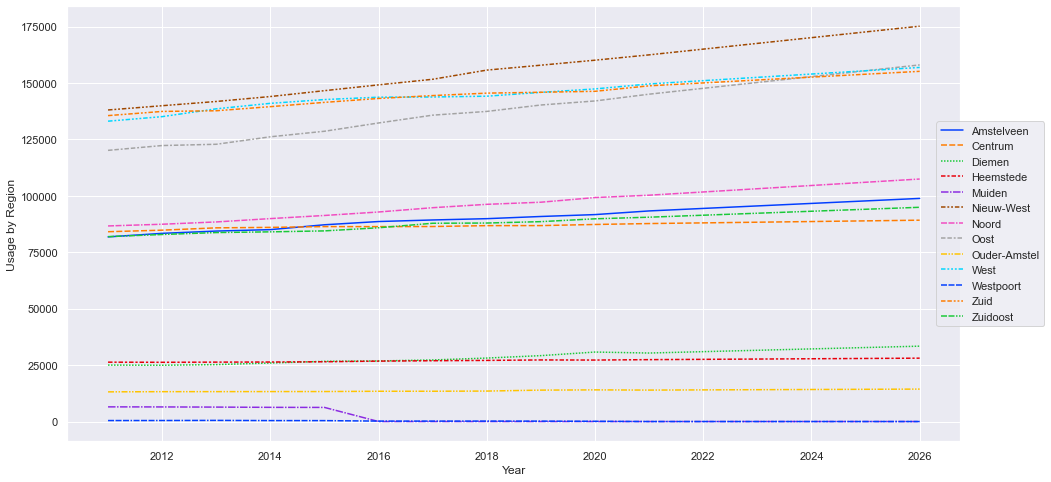

POPULATION 0 TO 15 Y/O


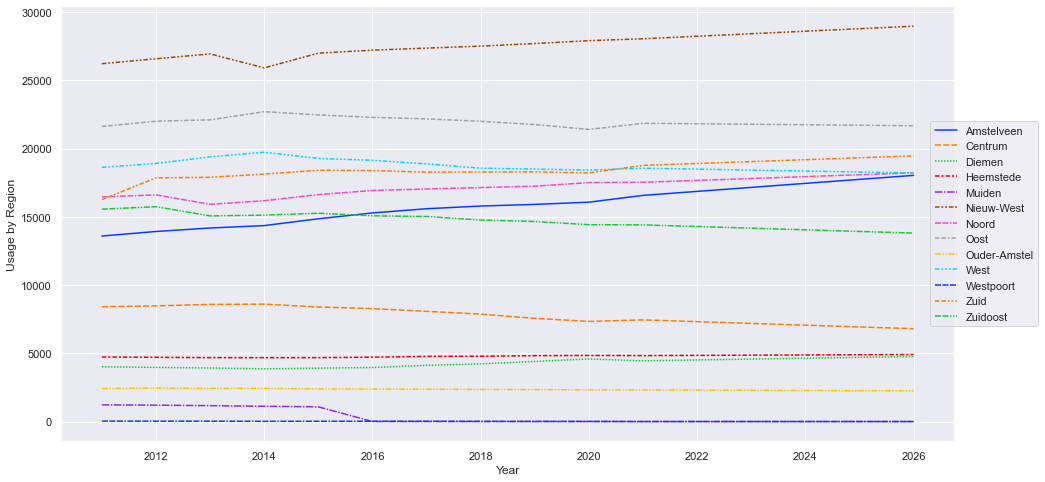

POPULATION 15 TO 25 Y/O


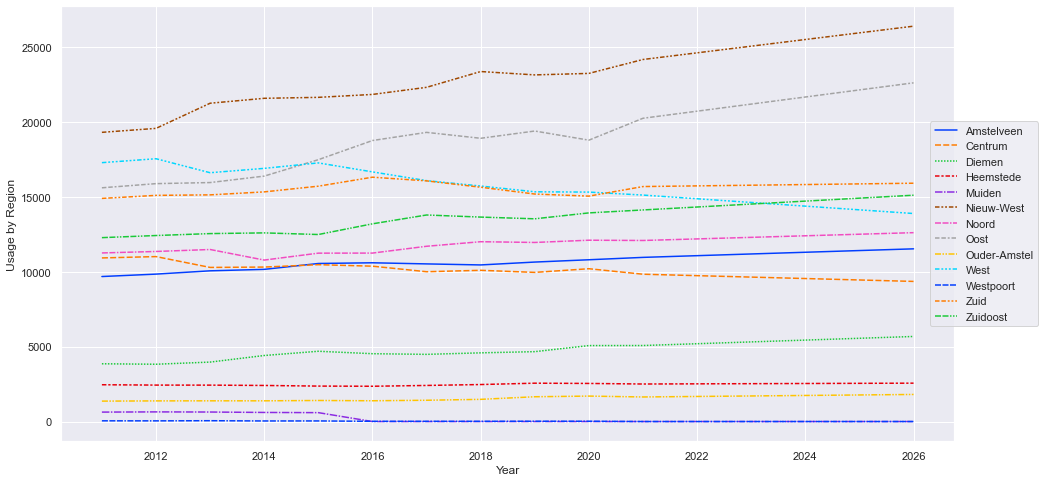

POPULATION 25 TO 45 Y/O


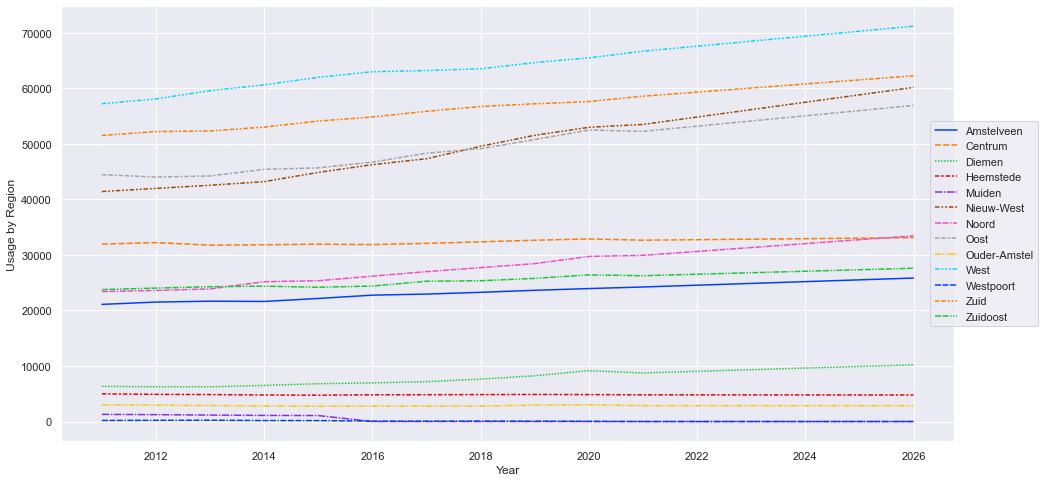

POPULATION 45 TO 65 Y/O


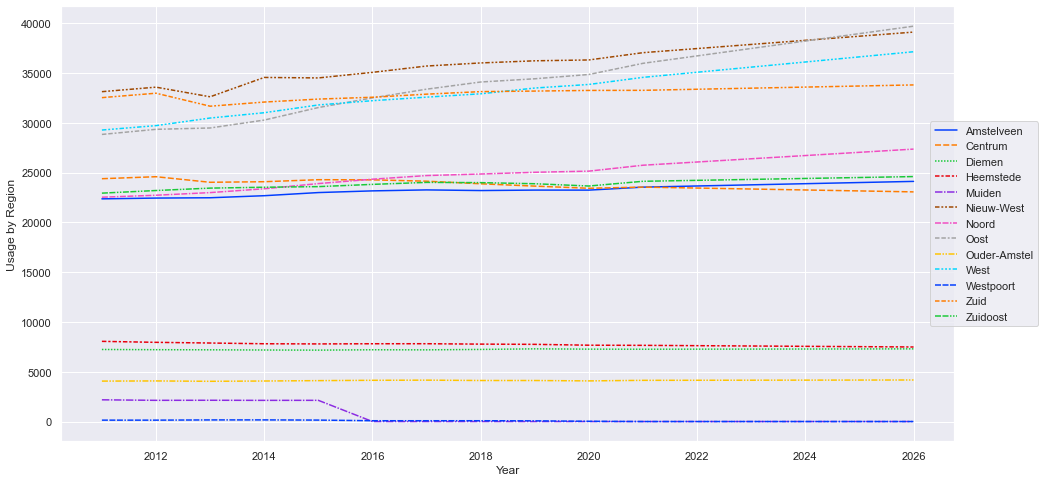

POPULATION 65 Y/O AND UP


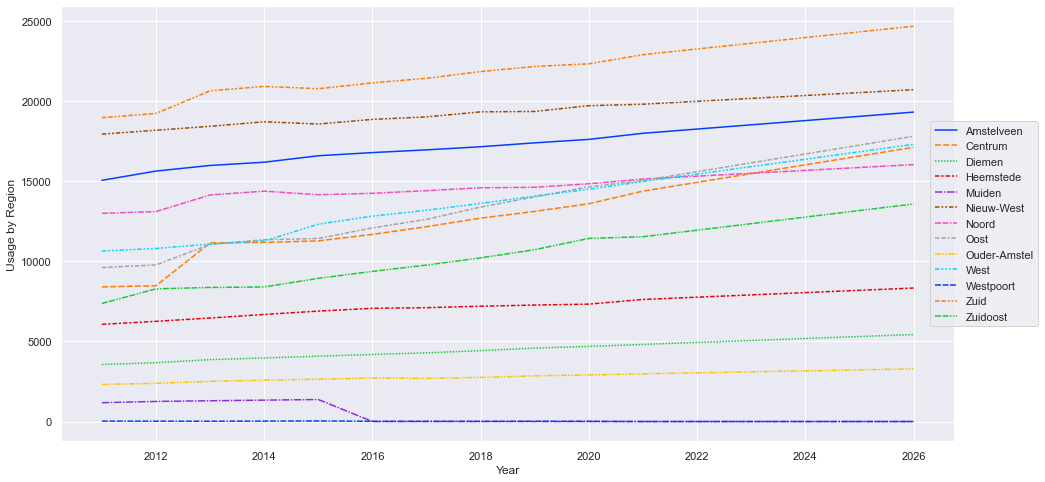

TOTAL HOUSEHOLDS


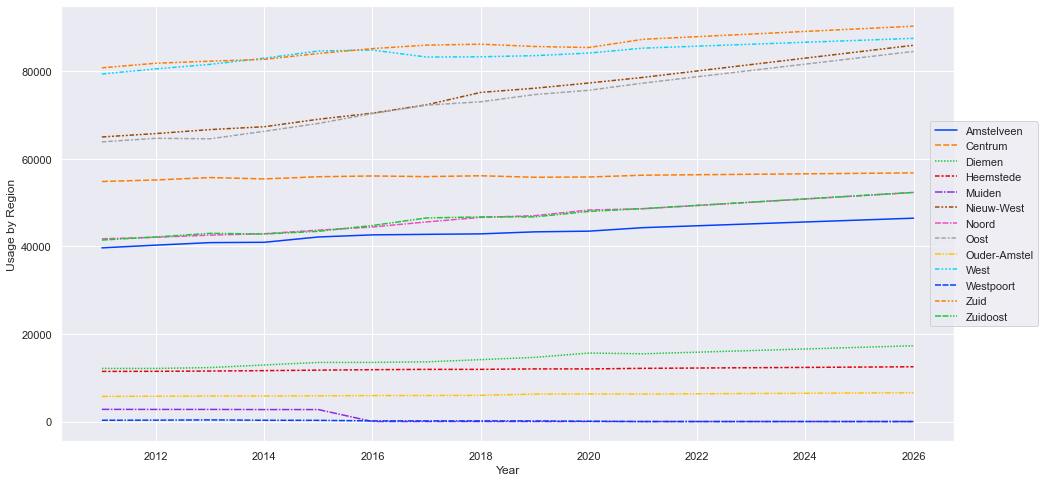

SINGLE-PERSON HOUSEHOLDS


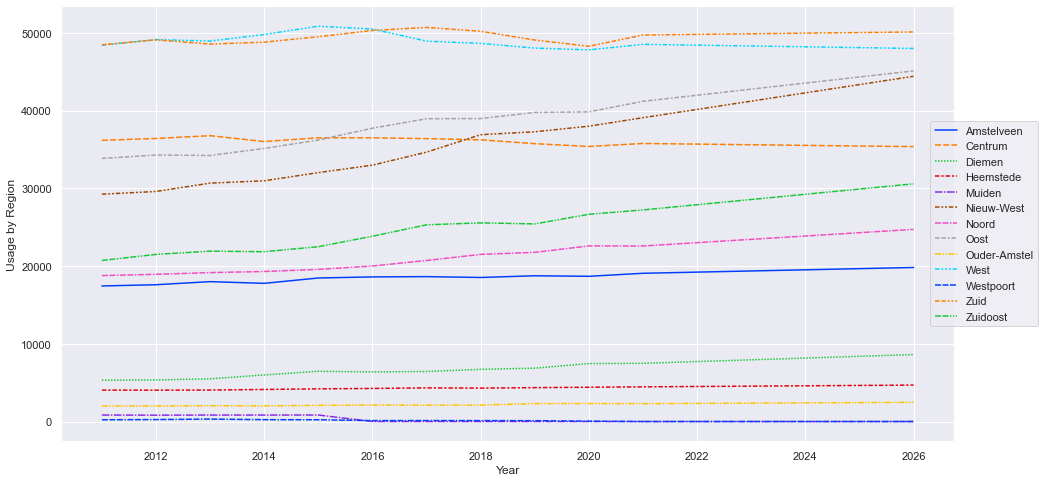

HOUSEHOLDS W/O CHILDREN


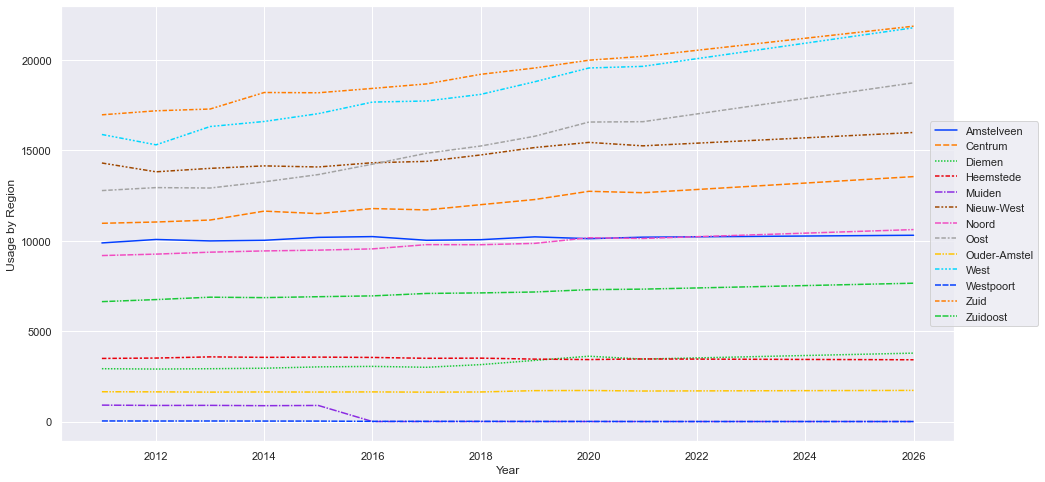

HOUSEHOLDS /W CHILDREN


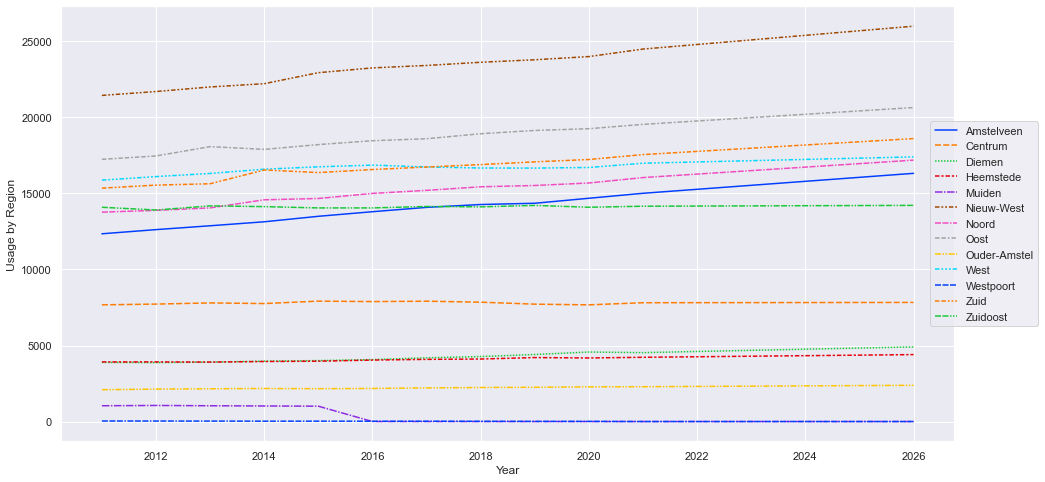

AIRBNB_REVIEWS


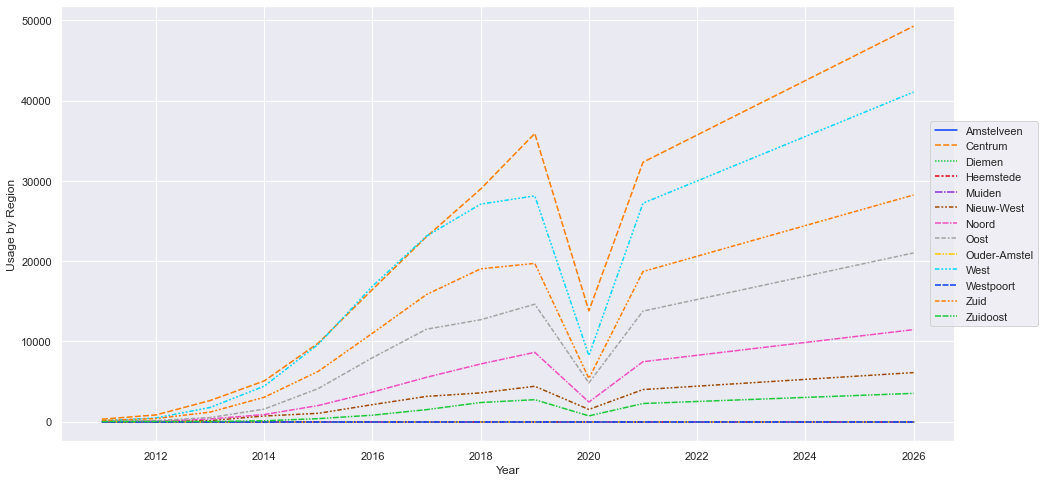

UNEMPLOYMENT_WW


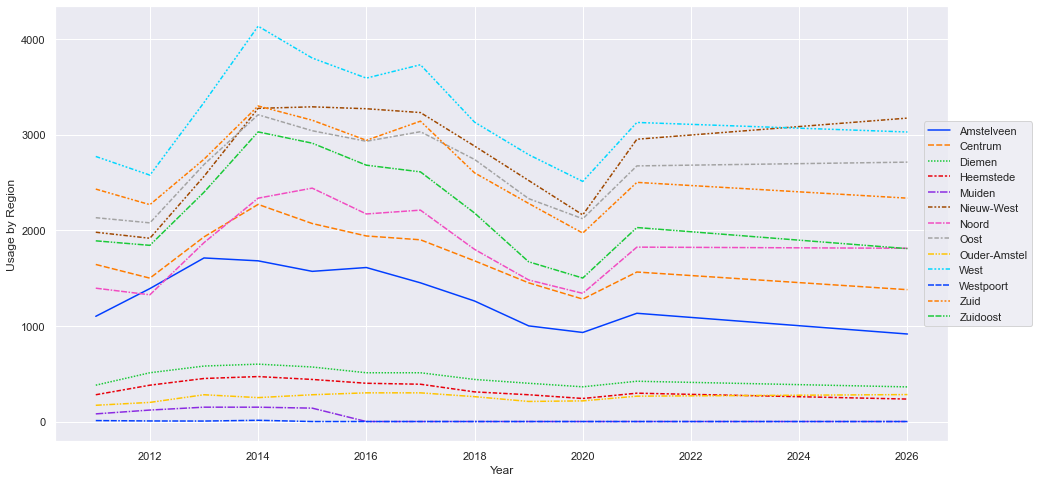

NUMBER_OF_JOBS


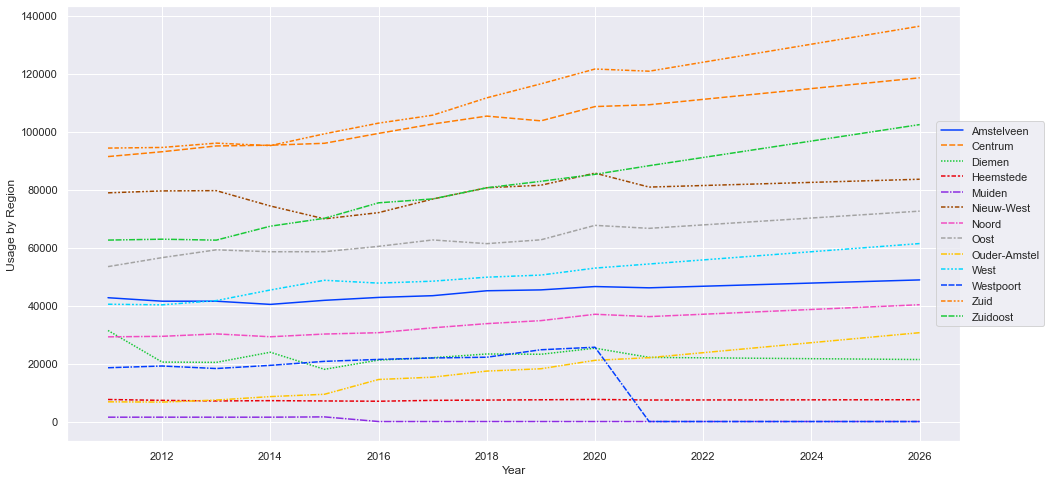

GUESTS_HOTELS


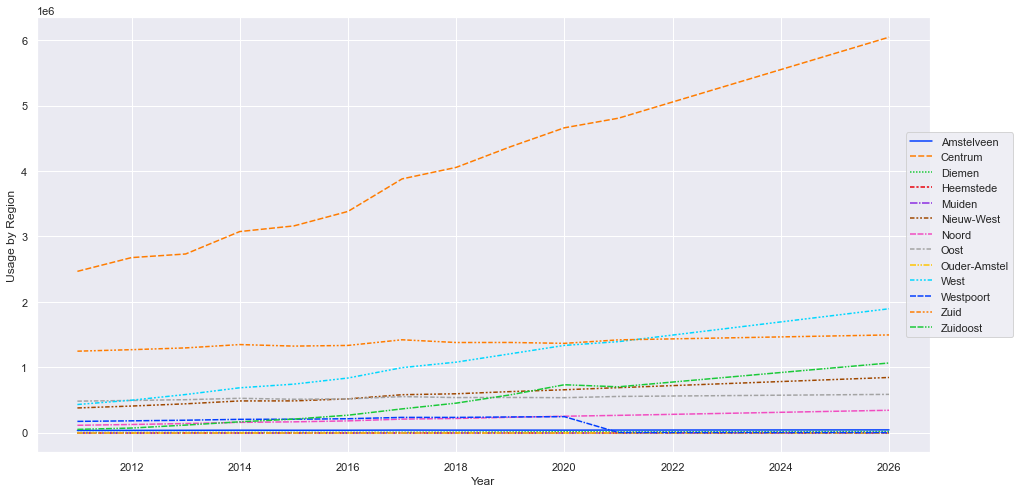

OVERNIGHT_STAYS_HOTELS


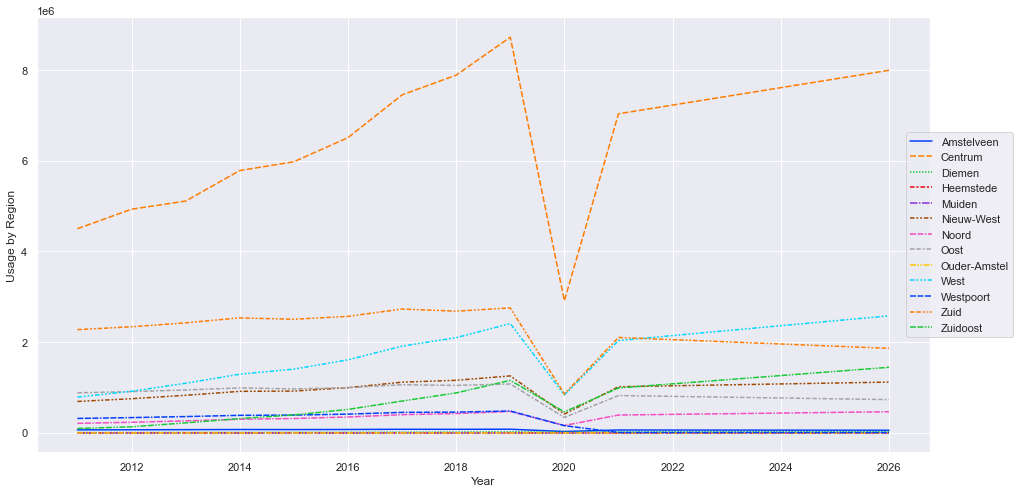

BUILT_before_1945


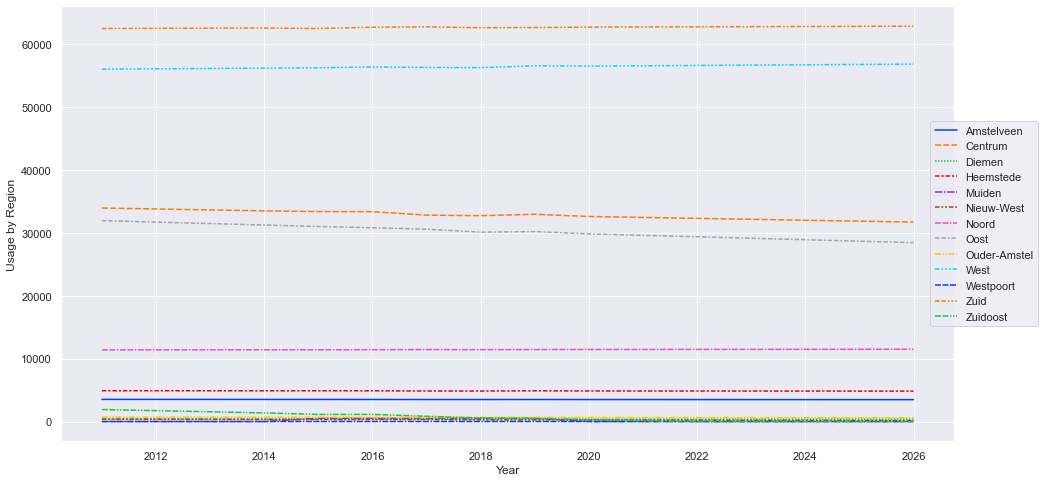

BUILT_1945_to_1965


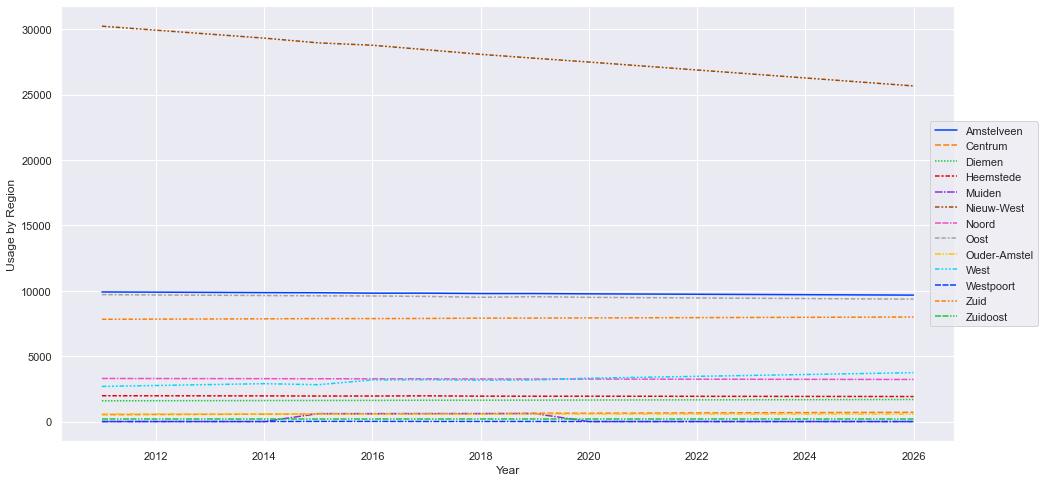

BUILT_1965_to_1975


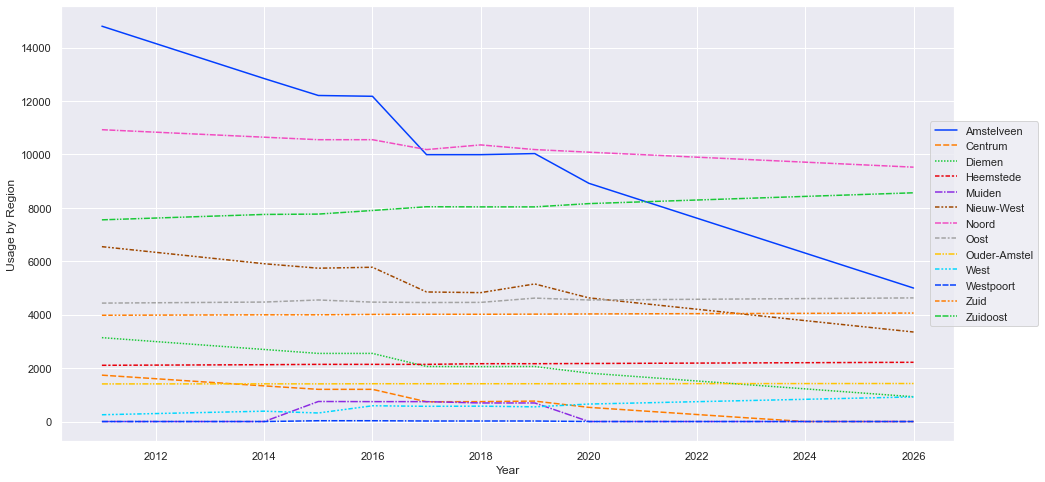

BUILT_1975_to_1985


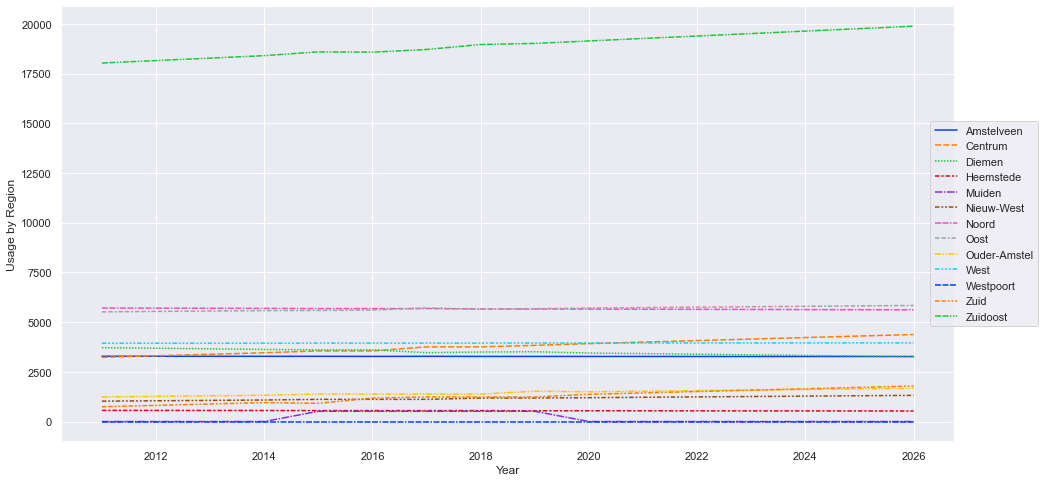

BUILT_1985_to_1995


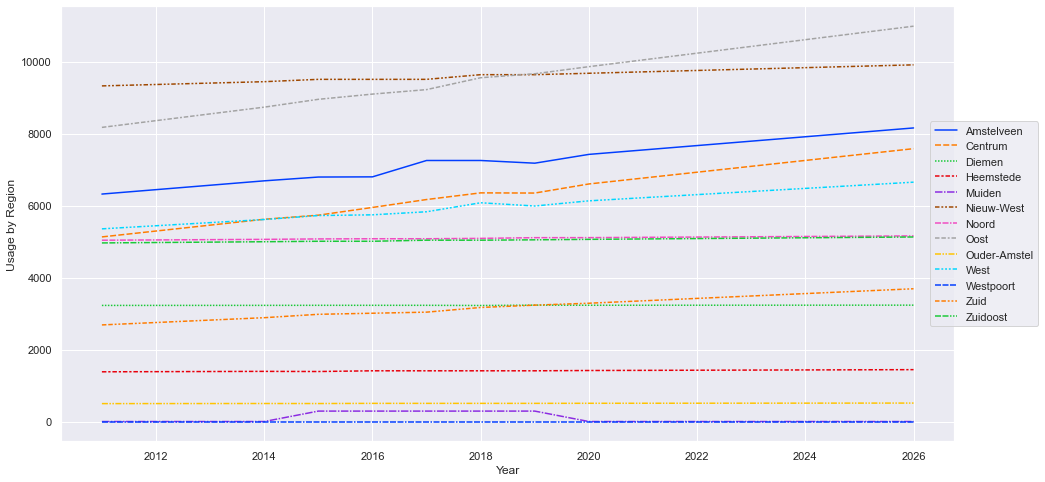

BUILT_1995_to_2005


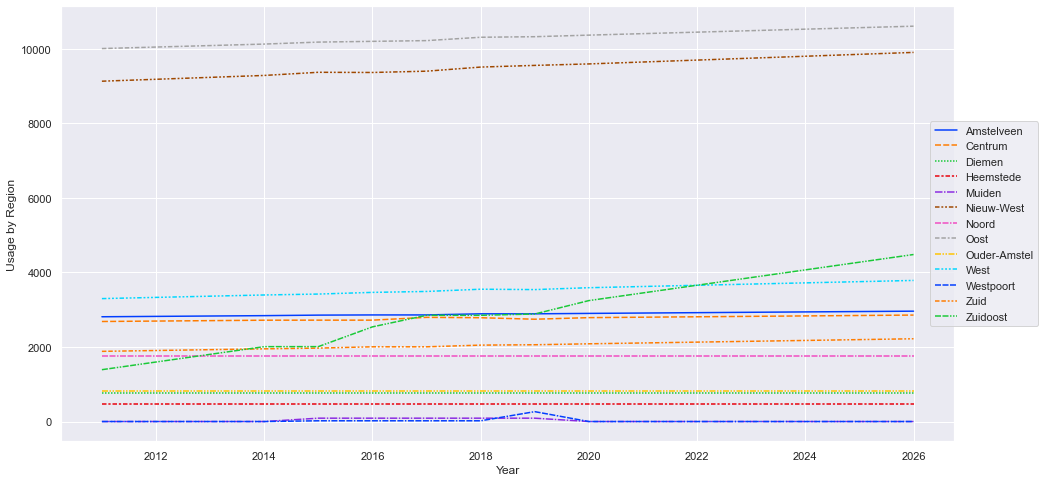

BUILT_2005_to_2015


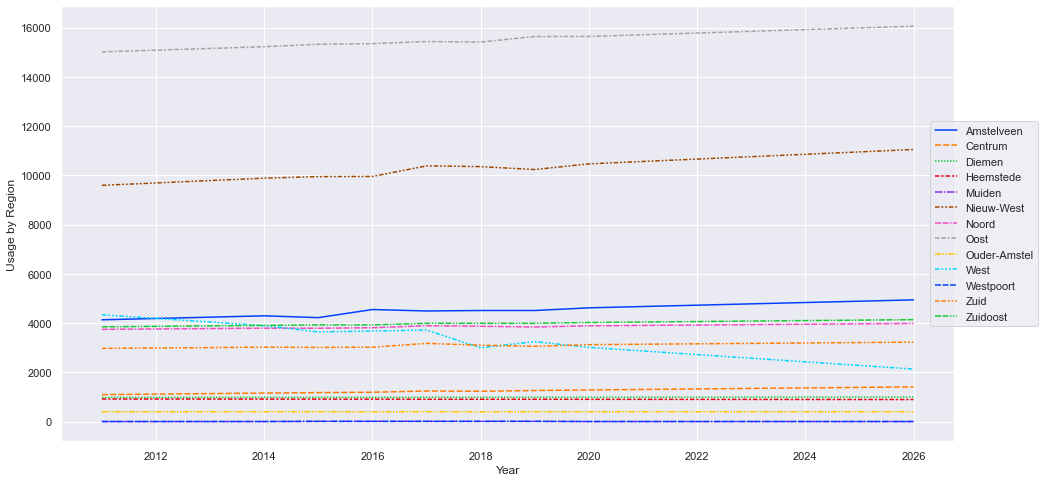

RENTAL_HOMES


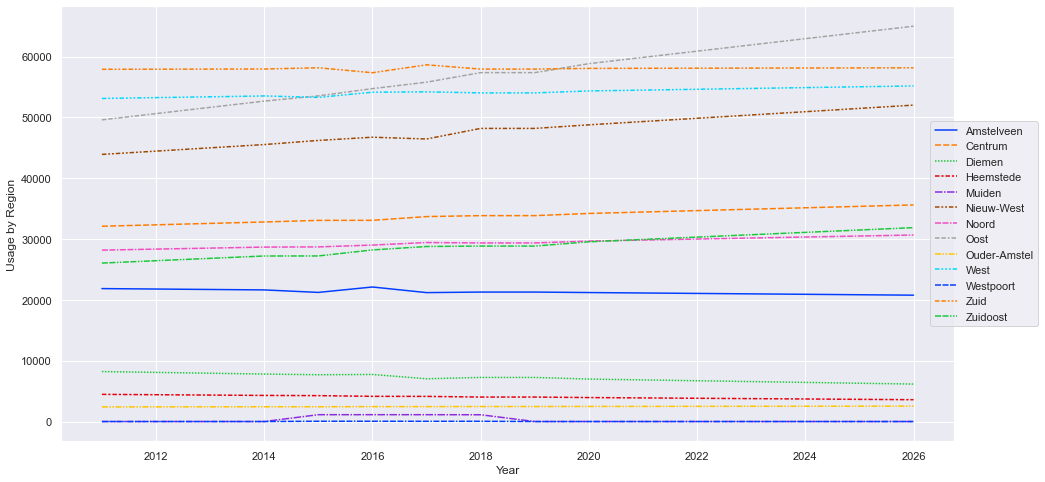

UNINHABITED


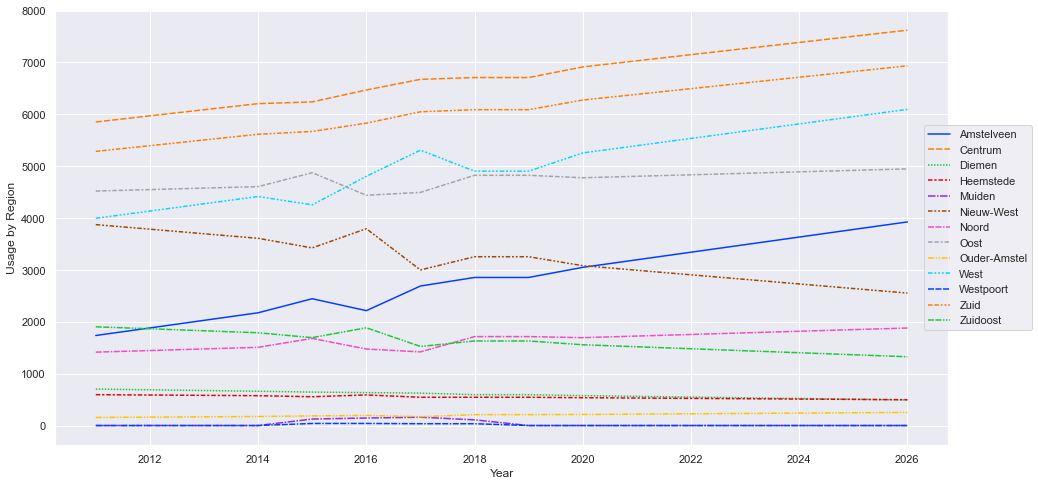

LOW_INCOMES


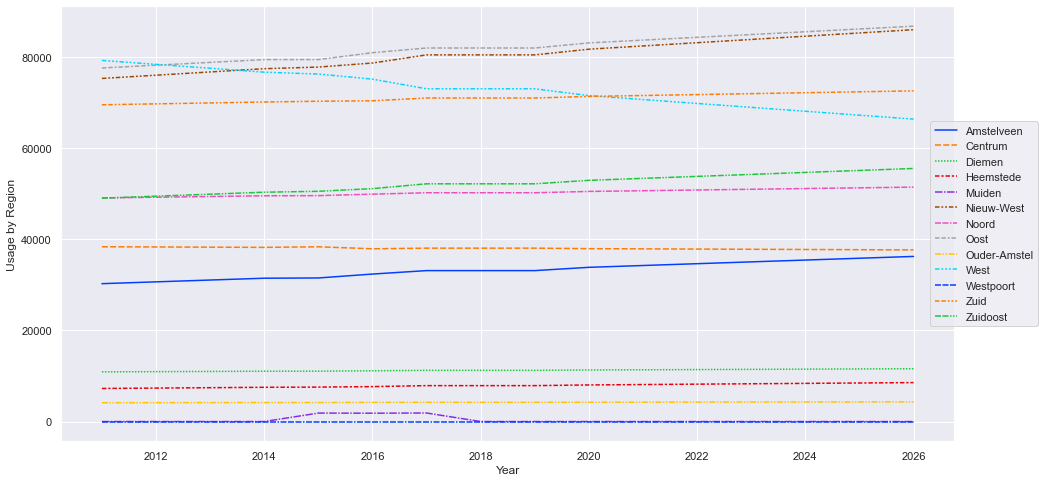

HIGH_INCOME


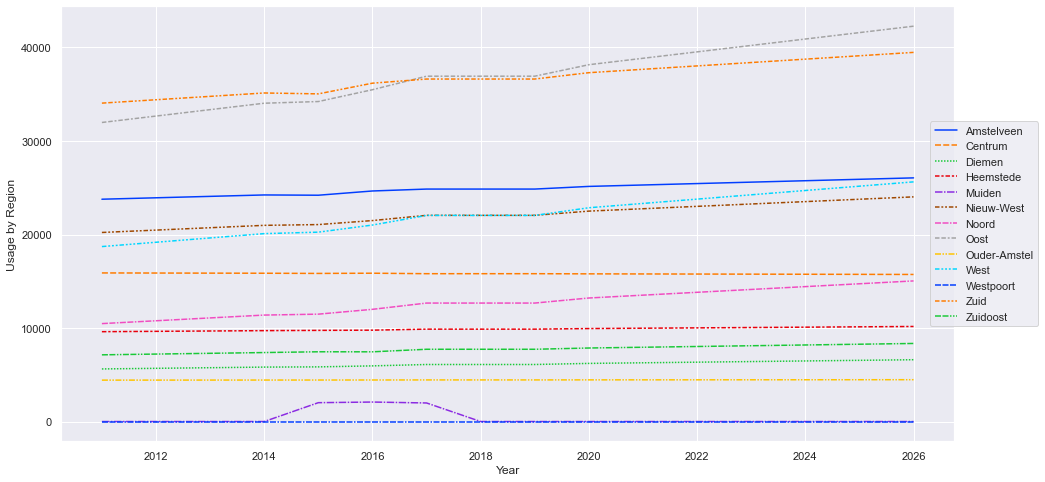

PLACES_TO_EAT


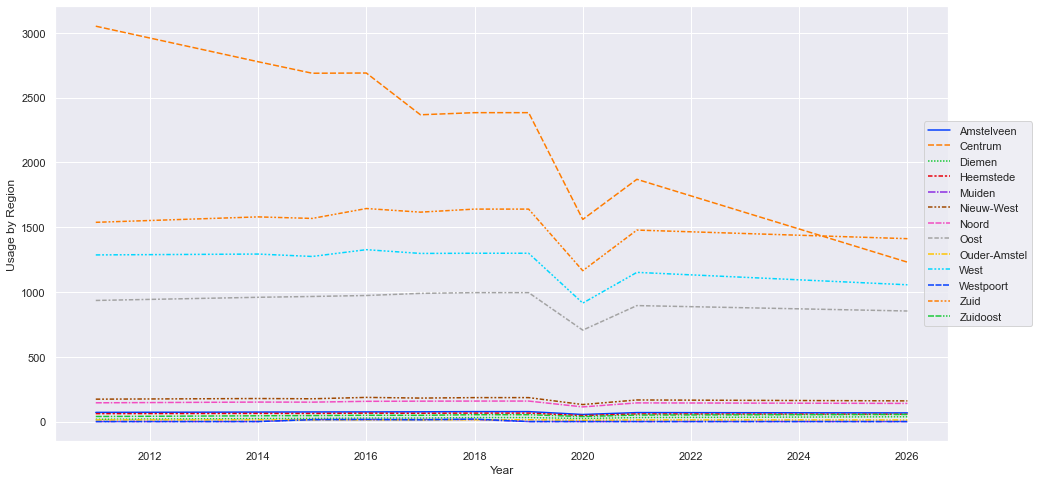

NATURAL_GAS_M3


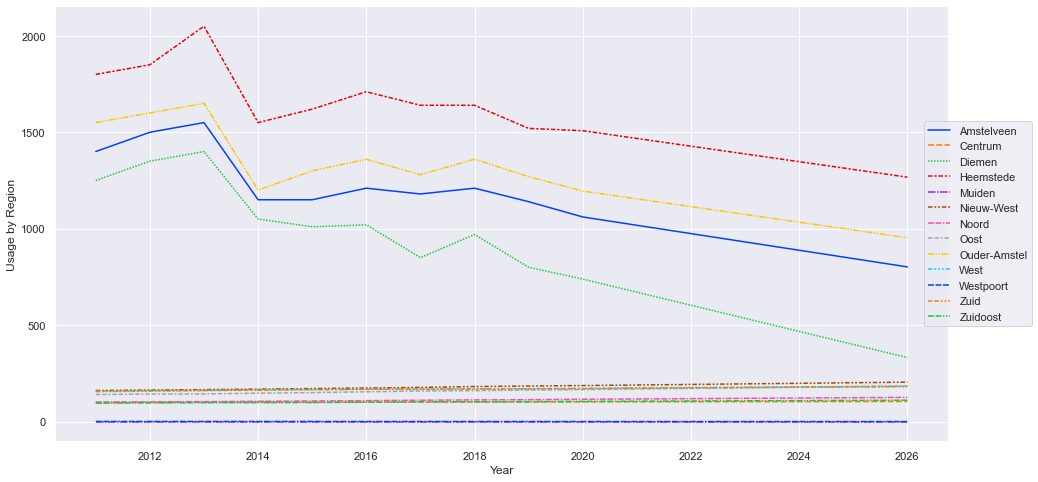

ELECTRICITY_KWH


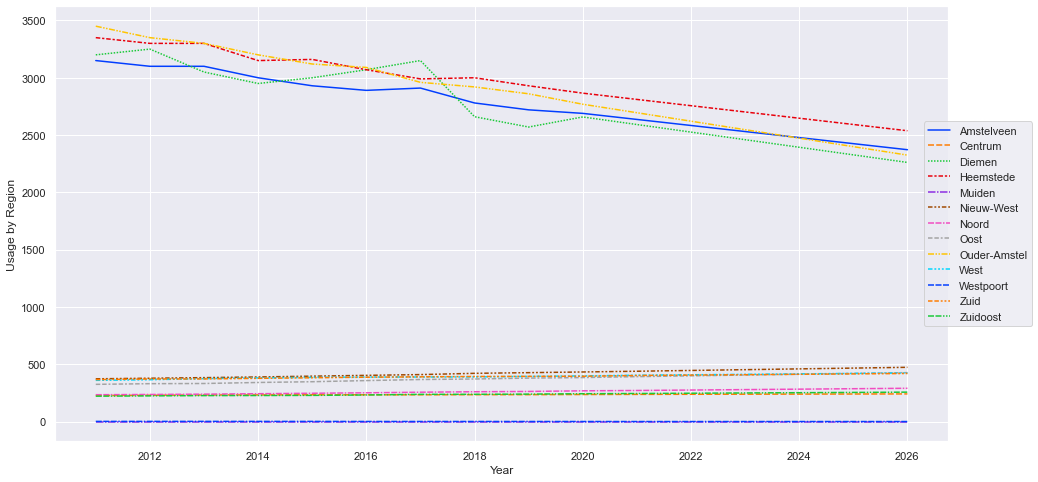

In [249]:
for i in nan_cols:

 


    reigon_df = df.pivot_table(index='YEAR',columns='BOROUGH',values=i,aggfunc='sum')

 

    fig, ax = plt.subplots(figsize=(16, 8))

 

    sns.lineplot(data=reigon_df, ax=ax, palette='bright')
    ax.set(xlabel='Year', ylabel='Usage by Region')

 

    # Put a legend to the right side
    plt.legend(loc='center right', bbox_to_anchor=(1.1, 0.5), ncol=1)
    
    print(i)

 

    plt.show()

In [248]:
#final
df.to_csv("extrapolated_input_features_future_latest_2501_5.csv",index=False)